## DUE DATE: Thursday, July 19, 2018

# Neural Network

# Neural Network using Scikit-Learn 

## 1. Import the Libraries:
1. numpy
2. matplotlib.pyplot
3. pandas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

## 2. Import the digit data set

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()


## 3. Show some description about the data

In [3]:
print("Data Size" , digits.data.shape)
print("Number of Labels (1797,):", digits.target.shape)


Data Size (1797, 64)
Number of Labels (1797,): (1797,)


## 4. Displaying the First 20 Images in the dataset

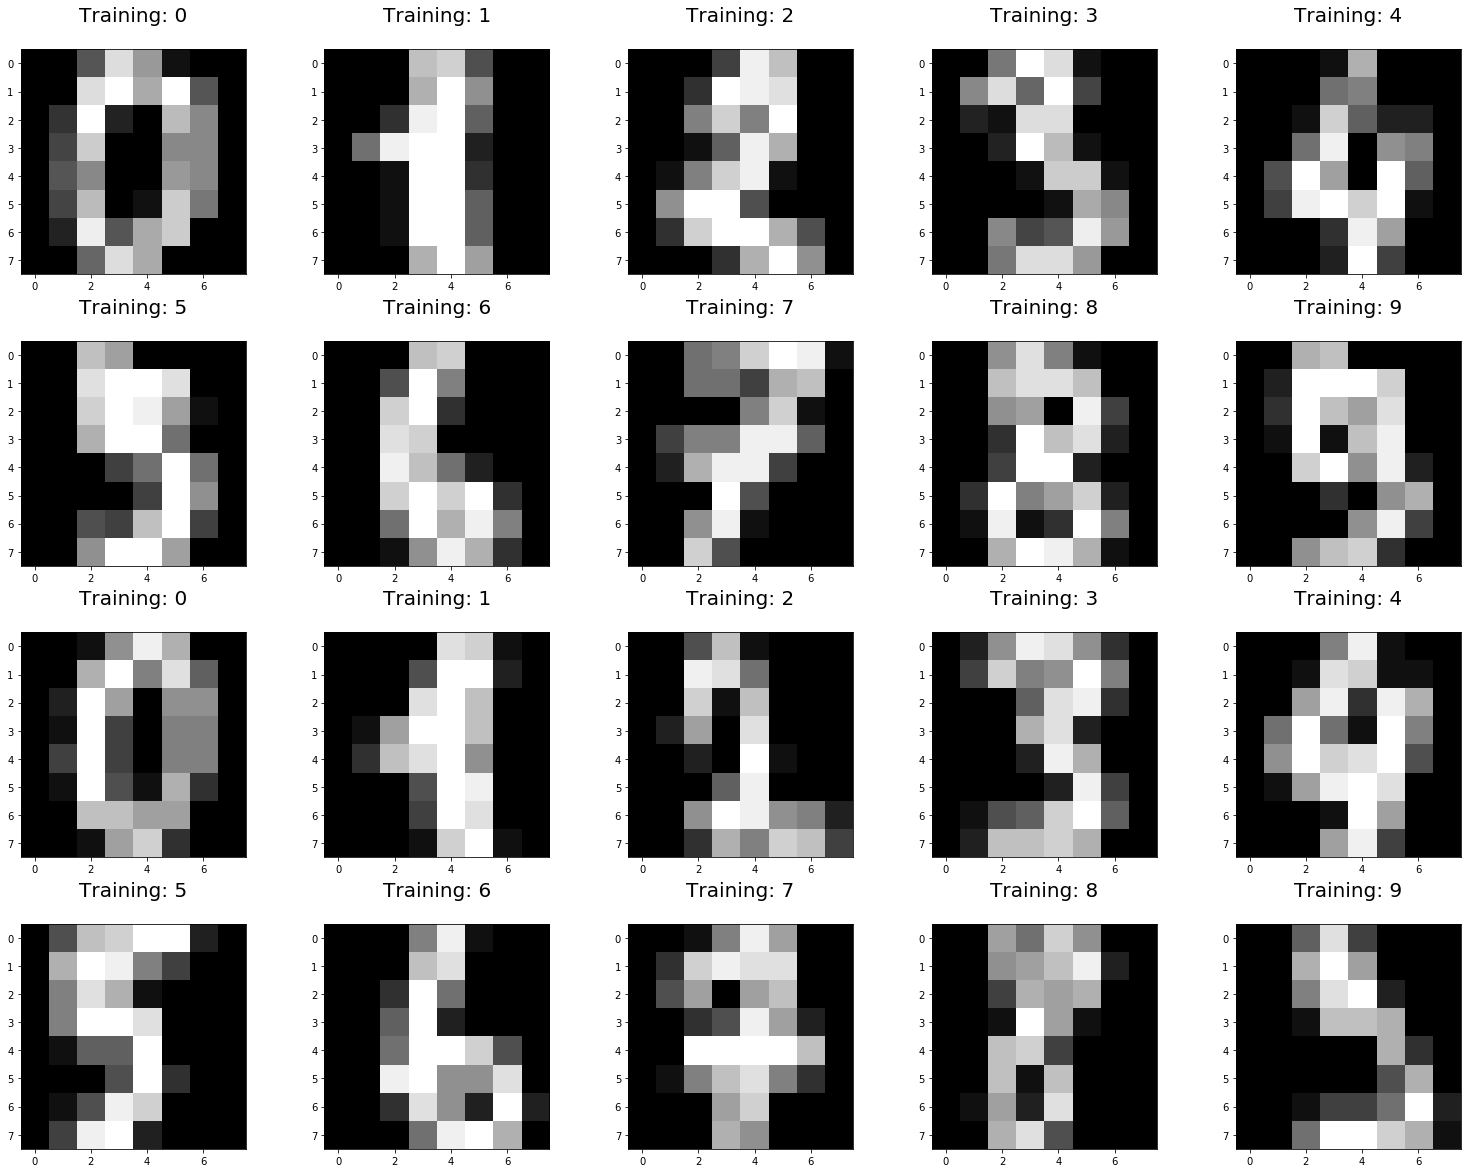

In [4]:
fig = plt.figure(figsize=(20, 16))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.35)
for index, (image, label) in enumerate(zip(digits.data[0:20], digits.target[0:20])):
    plt.subplot(4, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)
plt.show()


## 5. Split the data into training and test sets

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=99)


## 6. Using the Perceptron Class of Scikit-Learn and create the model

In [6]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score 

ppn = Perceptron(eta0 = 0.001)
tic = time.clock()
ppn.fit(X_train, y_train)  
toc = time.clock()
print('Time to complete= ',toc - tic)

Time to complete=  0.01505013088120237


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


## 7.  Test the model obtained from using the Perceptron Class of Scikit-Learn 

In [7]:
from sklearn.metrics import classification_report, confusion_matrix  
tic = time.clock()
predictions = ppn.predict(X_test)
toc = time.clock()
print('Time to complete= ',toc - tic)
cm = confusion_matrix(y_test, predictions)
print("confusion matrix: \n",cm)  
score = accuracy_score(y_test, predictions)
print("===========================================")
print("score: ",score)
print("===========================================")
print("classification report: \n",classification_report(y_test, predictions)) 

Time to complete=  0.006904466381400378
confusion matrix: 
 [[38  0  0  0  0  0  0  0  0  0]
 [ 0 26  2  1  0  0  0  0  0  0]
 [ 0  0 42  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  0  0  1]
 [ 0  1  0  0 26  0  0  1  0  0]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 0  0  1  0  0  0 40  0  0  0]
 [ 0  0  0  0  1  0  0 44  0  0]
 [ 0  1  2  1  0  0  1  0 27  0]
 [ 0  1  0  0  0  0  0  0  0 29]]
score:  0.9611111111111111
classification report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        38
          1       0.90      0.90      0.90        29
          2       0.89      1.00      0.94        42
          3       0.95      0.97      0.96        40
          4       0.96      0.93      0.95        28
          5       1.00      1.00      1.00        35
          6       0.98      0.98      0.98        41
          7       0.98      0.98      0.98        45
          8       1.00      0.84      0.92        32
          9       0.97    

# Our implementation of Neural Network

## 1.  Define all activation functions and thier derivatives 

#### sigmoid function:

In [8]:
def sigmoid(x):
    return 1/(1+(np.exp(-x)))

#### derivative of sigmoid function:

In [9]:
def sigmoid_d(x):
    return sigmoid(x) * (1 - sigmoid(x))

#### Tanh function:

In [10]:
def Tanh(x):
    return np.tanh(x)
    #return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

#### derivative of Tanh function:

In [11]:
def Tanh_d(x):
    return 1-np.square(np.tanh(x))
    #return 1-(Tanh(x)**2)

#### ReLU function:

In [12]:
def ReLU(x):
    return x * (x > 0)
    #return max(0,x)
#ReLU = np.vectorize(ReLU)

#### derivative of ReLU function:

In [13]:
def ReLU_d(x):
    return 1. * (x > 0)
#    if x < 0:
#        y=0
#    else:
#        y=1
#    return y
#ReLU_d = np.vectorize(ReLU_d)

#### Leaky ReLU function:

In [14]:
def L_ReLU(x):
    alpha=0.01
    xh=x.copy()
    xl=x.copy()
    xh[x < 0] = 0
    xl[x >= 0] =0
    xl=xl*alpha
    return xh+xl
#    return max(0.01*x,x)
#L_ReLU = np.vectorize(L_ReLU)

#### derivative of Leaky ReLU function:

In [15]:
def L_ReLU_d(x):
    alpha=0.01
    dx = np.ones_like(x)
    dx[x < 0] = alpha
    return dx
#    if x < 0:
#        y=0.01
#    else:
#        y=1
#    return y
#L_ReLU_d = np.vectorize(L_ReLU_d)

#### cost function:

In [16]:
def cost(y,A2):
    return  -np.sum(y*np.log(A2) + (1-y)*np.log(1-A2))


#### the neural network function:

In [17]:
def Propagation(X, y, n_h, n_y, alpha, iterations,g1,g2,g1_prime):
    epoch = int(iterations//20)
    cost_list = [[],[]]
    m = X.shape[1]
    n_x = X.shape[0]
    W1 = np.random.randn(n_h, n_x)
    b1 = np.random.randn(n_h, 1)
    W2 = np.random.randn(n_y, n_h)
    b2 = np.random.randn(n_y, 1)
    for i in range(iterations):
        Z1 = np.dot(W1, X) + b1
        A1 = g1(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = g2(Z2)
        if i%epoch == 0:
            cost = -np.sum(y*np.log(A2) + (1-y)*np.log(1-A2))
            cost_list[0].append(i)
            cost_list[1].append(cost)
        dZ2 = A2 - y
        dW2 = (1/m) * np.dot(dZ2, A1.T)
        db2 = (1/m) * np.sum(dZ2)
        dZ1 = np.dot(W2.T, dZ2) * g1_prime(Z1)
        dW1 = (1/m) * np.dot(dZ1, X.T)
        db1 = (1/m) * np.sum(dZ1)
        W2 = W2 - alpha * dW2
        b2 = b2 - alpha * db2
        W1 = W1 - alpha * dW1
        b1 = b1 - alpha * db1
    return W1, b1, W2, b2, cost_list

#### the neural network function (alpha decy and momentum): 

In [18]:
def Propagation2(X, y, n_h, n_y, alpha, iterations,g1,g2,g1_prime):
    epoch = int(iterations//20)
    epoch_a = int(iterations//10)
    cost_list = [[],[]]
    m = X.shape[1]
    n_x = X.shape[0]
    W1 = np.random.randn(n_h, n_x)
    b1 = np.random.randn(n_h, 1)
    W2 = np.random.randn(n_y, n_h)
    b2 = np.random.randn(n_y, 1)
    # momentum
    beta=0.0001
    mmt_W1=np.zeros(W1.shape)
    mmt_W2=np.zeros(W2.shape)
    mmt_b1=np.zeros(b1.shape)
    mmt_b2=np.zeros(b2.shape)
    
    for i in range(iterations):
        Z1 = np.dot(W1, X) + b1
        A1 = g1(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = g2(Z2)
        if i%epoch_a == 0:
            alpha=alpha*0.5
        if i%epoch == 0:
            cost = -np.sum(y*np.log(A2) + (1-y)*np.log(1-A2))
            cost_list[0].append(i)
            cost_list[1].append(cost)
        dZ2 = A2 - y
        dW2 = (1/m) * np.dot(dZ2, A1.T)
        db2 = (1/m) * np.sum(dZ2)
        dZ1 = np.dot(W2.T, dZ2) * g1_prime(Z1)
        dW1 = (1/m) * np.dot(dZ1, X.T)
        db1 = (1/m) * np.sum(dZ1)
        #use momentum
       # mmt_W1=dW1+(beta*mmt_W1)
       # mmt_W2=dW2+(beta*mmt_W2)
       # mmt_b1=db1+(beta*mmt_b1)
       # mmt_b2=db2+(beta*mmt_b2)
        
        W2 = W2 - alpha * dW2
        b2 = b2 - alpha * db2
        W1 = W1 - alpha * dW1
        b1 = b1 - alpha * db1
    return W1, b1, W2, b2, cost_list

#### Foreword Propagation function (and do the prediction):

In [19]:
def forewordPropagation(X, W1, W2, b1, b2, g1,g2):
    Z1 = np.dot(W1, X) + b1
    A1 = g1(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = g2(Z2)
    #do the prediction and return the output
    return np.argmax(A2,0)

#### reshaping the y_train data:

In [20]:
Y=np.zeros((y_train.shape[0], 10))
for i in range(y_train.shape[0]):
    Y[i,y_train[i]]=1

## 2.  Using sigmoid as activation function:

#### train the model:

Time to complete= 1238.85037586087
W1= [[ 1.83998196 -0.34289132 -1.17367464 ... -1.90029659  0.26202228
  -0.49842101]
 [-2.25481383 -0.45693923  0.62812283 ...  0.17418394 -1.04814718
   1.12714979]
 [ 0.49635933 -0.30697538 -0.01591719 ...  1.15108685  0.86061348
   0.37204266]
 ...
 [ 1.29207958  0.30916671  0.49083277 ... -1.95142146 -0.39888454
  -0.11067842]
 [-1.44222629 -0.44579821  0.88150068 ... -0.86596414 -0.22696735
   0.50208435]
 [ 0.089204   -0.27245434  0.12614935 ...  1.36278978 -0.62743422
  -0.89277167]] 
 b1= [[ 0.86510257]
 [ 0.29803853]
 [ 0.87284671]
 [ 0.60407381]
 [-0.75725001]
 [ 0.53443482]
 [ 1.16814015]
 [ 0.26528864]
 [-0.35218262]
 [ 0.66273122]
 [ 1.38873659]
 [-0.45468349]
 [-0.49221635]
 [ 0.39397122]
 [-0.37468739]
 [ 0.16401743]
 [ 2.06996783]
 [ 0.71208342]
 [ 1.37439917]
 [ 0.61892653]
 [-0.0798997 ]
 [-0.87153121]
 [-0.24843429]
 [-1.0869391 ]
 [-0.33431042]
 [ 0.77885914]
 [-1.98020679]
 [-0.04523542]
 [ 0.88544763]
 [ 0.80227779]
 [ 1.97685917

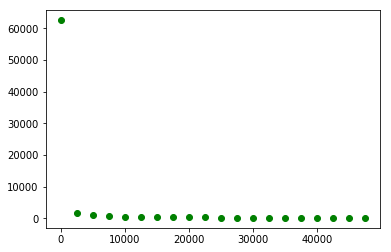

In [21]:
n_h = 200; n_y = 10
alpha = 0.005
iterations = 50000
tic = time.clock()
W1, b1, W2, b2, cost_list = Propagation(X_train.T, Y.T, n_h, n_y, alpha, iterations,sigmoid,sigmoid,sigmoid_d)
toc = time.clock()
print('Time to complete=',toc - tic)
print('W1=',W1, '\n', 'b1=',b1, '\n', 'W2=',W2, '\n', 'b2=',b2)
plt.plot(cost_list[0], cost_list[1], 'go')


#### predict then test the model:

In [22]:
tic = time.clock()
prediction = forewordPropagation(X_test.T, W1, W2, b1, b2, sigmoid,sigmoid)
toc = time.clock()
print('Time to complete= ',toc - tic)
print("===========================================")
cm = confusion_matrix(y_test, prediction)
print("confusion matrix: \n",cm)  
score = accuracy_score(y_test, prediction)
print("===========================================")
print("score: ",score)
print("===========================================")
print("classification report: \n",classification_report(y_test, prediction)) 

Time to complete=  0.003461590472397802
confusion matrix: 
 [[37  0  0  0  0  1  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  1]
 [ 0  1 37  2  1  0  0  0  1  0]
 [ 0  0  0 37  0  0  0  1  0  2]
 [ 0  0  0  0 25  0  0  2  1  0]
 [ 0  0  0  1  1 33  0  0  0  0]
 [ 0  1  0  0  0  0 40  0  0  0]
 [ 0  1  0  0  0  1  0 42  1  0]
 [ 0  1  0  1  0  2  2  0 24  2]
 [ 0  0  0  1  0  1  0  0  0 28]]
score:  0.9194444444444444
classification report: 
              precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       0.88      0.97      0.92        29
          2       1.00      0.88      0.94        42
          3       0.88      0.93      0.90        40
          4       0.93      0.89      0.91        28
          5       0.87      0.94      0.90        35
          6       0.95      0.98      0.96        41
          7       0.93      0.93      0.93        45
          8       0.89      0.75      0.81        32
          9       0.85    

## 3.  Using Tanh as activation function

#### train the model:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


Time to complete= 743.4954602092168
W1= [[-1.69547033  1.43372212  0.66719272 ... -1.07306138 -0.31863063
  -0.19561033]
 [-0.49877203  0.69251882 -0.64727166 ...  0.73596477  2.60305064
  -1.56223147]
 [-0.41505112  1.68951844 -0.87361471 ...  0.23676593  0.49638007
   0.29421753]
 ...
 [-0.21628604 -0.791092   -1.99172102 ... -0.46344054  0.32773146
   0.1338583 ]
 [-1.13231213 -0.28070601  1.36183236 ... -0.80673548 -0.02074422
  -0.7058362 ]
 [-0.16845725  1.08873266  2.08340587 ... -1.91663376  1.36502003
   0.17591196]] 
 b1= [[ 0.11594205]
 [ 0.96408254]
 [ 0.72018289]
 [-1.40698438]
 [-0.97741013]
 [ 0.92584482]
 [ 2.6590777 ]
 [ 0.32204354]
 [-0.92880672]
 [-0.58565805]
 [-1.01238145]
 [-0.78877924]
 [ 0.91118829]
 [-1.62614727]
 [-0.74077719]
 [ 1.38569546]
 [ 0.62640715]
 [ 0.86858795]
 [ 0.23727148]
 [-1.62814068]
 [-1.47456818]
 [-1.62272884]
 [-0.39825015]
 [-0.23646745]
 [ 1.27717147]
 [-0.01368776]
 [ 2.37428571]
 [-0.40769323]
 [-0.31128701]
 [ 0.45460714]
 [ 0.2548769

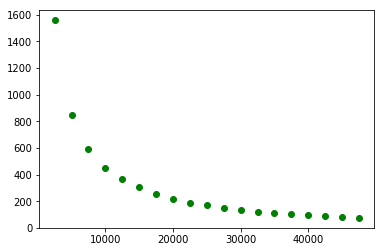

In [23]:
n_h = 200; n_y = 10
alpha = 0.005
iterations = 50000
tic = time.clock()
W1, b1, W2, b2, cost_list = Propagation(X_train.T, Y.T, n_h, n_y, alpha, iterations,Tanh,sigmoid,Tanh_d)
toc = time.clock()
print('Time to complete=',toc - tic)
print('W1=',W1, '\n', 'b1=',b1, '\n', 'W2=',W2, '\n', 'b2=',b2)
plt.plot(cost_list[0], cost_list[1], 'go')

#### predict then test the model:

In [24]:
tic = time.clock()
prediction = forewordPropagation(X_test.T, W1, W2, b1, b2, Tanh,sigmoid)
toc = time.clock()
print('Time to complete= ',toc - tic)
print("===========================================")
cm = confusion_matrix(y_test, prediction)
print("confusion matrix: \n",cm)  
score = accuracy_score(y_test, prediction)
print("===========================================")
print("score: ",score)
print("===========================================")
print("classification report: \n",classification_report(y_test, prediction)) 

Time to complete=  0.002758285118261483
confusion matrix: 
 [[36  0  0  0  0  1  0  0  1  0]
 [ 0 26  0  1  1  0  0  0  1  0]
 [ 1  1 39  0  0  0  0  0  1  0]
 [ 0  0  0 39  0  0  0  0  0  1]
 [ 0  0  0  0 25  0  0  2  1  0]
 [ 0  0  0  0  0 32  0  2  1  0]
 [ 0  0  1  0  1  1 37  0  1  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  3  0  1  0  1  0  0 27  0]
 [ 1  0  0  3  0  1  0  1  0 24]]
score:  0.9166666666666666
classification report: 
              precision    recall  f1-score   support

          0       0.95      0.95      0.95        38
          1       0.87      0.90      0.88        29
          2       0.97      0.93      0.95        42
          3       0.89      0.97      0.93        40
          4       0.93      0.89      0.91        28
          5       0.89      0.91      0.90        35
          6       1.00      0.90      0.95        41
          7       0.90      1.00      0.95        45
          8       0.82      0.84      0.83        32
          9       0.96    

## 4.  Using RuLU as activation function

#### train the model:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


Time to complete= 663.4786388354953
W1= [[-1.19568498  1.02955941  0.9616262  ... -0.64959197  0.57083272
  -1.18382293]
 [-2.10553284 -0.15971565 -0.81876568 ... -0.09059236 -0.77748443
  -0.5824582 ]
 [-2.05544213 -0.40624465  0.14947859 ...  2.18651088 -0.32197125
   0.57409213]
 ...
 [-1.22493651  0.84839127 -1.52446699 ... -0.4112228  -1.79732028
   0.2970112 ]
 [-1.88577533 -0.60179572 -0.16142366 ... -0.28168314 -0.45312807
  -1.01393759]
 [-1.4572994  -0.3535909   0.40304862 ...  1.34780408 -0.23518272
  -0.65786748]] 
 b1= [[-0.3713283 ]
 [-2.09014464]
 [-1.97964849]
 [-0.00391585]
 [-1.08662603]
 [ 0.57975023]
 [-0.74212896]
 [ 0.02073049]
 [-2.50802584]
 [ 0.50826402]
 [-0.00616645]
 [ 0.79535499]
 [-0.52142224]
 [ 1.39245105]
 [-0.16392221]
 [-0.18645177]
 [-0.73538054]
 [-0.94063399]
 [-0.45092813]
 [-2.33519668]
 [-2.80308799]
 [-0.06130936]
 [ 1.02636955]
 [ 1.15726202]
 [-1.25301109]
 [-1.44935125]
 [-0.65891301]
 [-3.02225211]
 [-1.25878667]
 [ 0.58241515]
 [-0.9927420

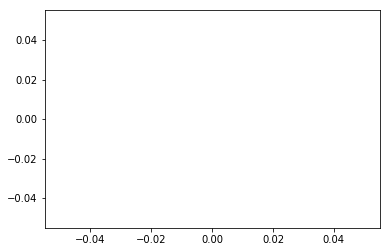

In [25]:
n_h = 200; n_y = 10
alpha = 0.005
iterations = 50000
tic = time.clock()
W1, b1, W2, b2, cost_list = Propagation(X_train.T, Y.T, n_h, n_y, alpha, iterations,ReLU,sigmoid,ReLU_d)
toc = time.clock()
print('Time to complete=',toc - tic)
print('W1=',W1, '\n', 'b1=',b1, '\n', 'W2=',W2, '\n', 'b2=',b2)
plt.plot(cost_list[0], cost_list[1], 'go')

#### predict then test the model:

In [26]:
tic = time.clock()
prediction = forewordPropagation(X_test.T, W1, W2, b1, b2, ReLU,sigmoid)
toc = time.clock()
print('Time to complete= ',toc - tic)
print("===========================================")
cm = confusion_matrix(y_test, prediction)
print("confusion matrix: \n",cm)  
score = accuracy_score(y_test, prediction)
print("===========================================")
print("score: ",score)
print("===========================================")
print("classification report: \n",classification_report(y_test, prediction)) 

Time to complete=  0.003380695264240785
confusion matrix: 
 [[38  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0]
 [ 0  0 40  2  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  1  1]
 [ 0  2  0  0 26  0  0  0  0  0]
 [ 0  0  0  1  0 34  0  0  0  0]
 [ 0  1  0  0  0  1 39  0  0  0]
 [ 0  1  0  2  0  0  0 42  0  0]
 [ 1  1  0  2  0  0  0  0 27  1]
 [ 0  0  0  2  0  2  1  0  1 24]]
score:  0.9361111111111111
classification report: 
              precision    recall  f1-score   support

          0       0.97      1.00      0.99        38
          1       0.85      1.00      0.92        29
          2       1.00      0.95      0.98        42
          3       0.81      0.95      0.87        40
          4       1.00      0.93      0.96        28
          5       0.92      0.97      0.94        35
          6       0.97      0.95      0.96        41
          7       1.00      0.93      0.97        45
          8       0.93      0.84      0.89        32
          9       0.92    

## 5.  Using Leaky RuLU as activation function

#### train the model:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


Time to complete= 1051.7823792125878
W1= [[-1.97544094  0.7299316  -0.27870415 ...  2.12273188  0.45997611
  -1.37714068]
 [ 0.43017402  0.21295967 -1.18299379 ...  0.3217478   0.63056953
  -0.32723939]
 [-0.31558642  0.90587831 -0.36749905 ...  1.25960266  1.93633994
   0.2169816 ]
 ...
 [-0.61773108  0.10777416 -0.2599055  ... -0.76588488 -0.42807745
   0.10580862]
 [ 0.22474231 -0.19822451  1.33823061 ...  0.25704839  0.88658509
   0.48784989]
 [ 0.34628633  0.21546718  0.21127668 ... -0.12324249 -2.35543779
  -1.01437303]] 
 b1= [[-1.17044655]
 [-1.66504561]
 [-0.36992603]
 [ 0.31498071]
 [-0.13329528]
 [-1.20836531]
 [ 1.25917641]
 [-0.32635265]
 [-1.16594902]
 [-2.61339055]
 [-0.31808624]
 [-1.12735998]
 [-0.01612359]
 [-1.08788339]
 [-0.47696598]
 [ 0.70865839]
 [-0.38721352]
 [-1.41130572]
 [ 0.07787261]
 [-0.43699503]
 [-0.66071954]
 [-0.82298737]
 [-0.18199267]
 [-0.85222823]
 [ 1.56909151]
 [-1.07076646]
 [-1.51679844]
 [-0.3177976 ]
 [-0.60191196]
 [-0.25534428]
 [-1.174982

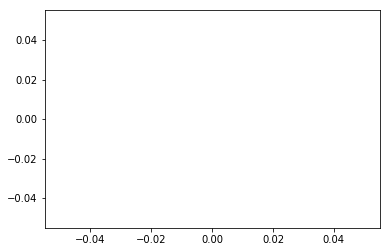

In [27]:
n_h = 200; n_y = 10
alpha = 0.005
iterations = 50000
tic = time.clock()
W1, b1, W2, b2, cost_list = Propagation(X_train.T, Y.T, n_h, n_y, alpha, iterations,L_ReLU,sigmoid,L_ReLU_d)
toc = time.clock()
print('Time to complete=',toc - tic)
print('W1=',W1, '\n', 'b1=',b1, '\n', 'W2=',W2, '\n', 'b2=',b2)
plt.plot(cost_list[0], cost_list[1], 'go')

#### predict then test the model:

In [28]:
tic = time.clock()
prediction = forewordPropagation(X_test.T, W1, W2, b1, b2, L_ReLU,sigmoid)
toc = time.clock()
print('Time to complete= ',toc - tic)
print("===========================================")
cm = confusion_matrix(y_test, prediction)
print("confusion matrix: \n",cm)  
score = accuracy_score(y_test, prediction)
print("===========================================")
print("score: ",score)
print("===========================================")
print("classification report: \n",classification_report(y_test, prediction)) 

Time to complete=  0.0048730307448749954
confusion matrix: 
 [[37  0  0  0  0  1  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0]
 [ 0  0 40  1  0  0  0  0  1  0]
 [ 0  0  0 39  0  0  0  1  0  0]
 [ 1  0  0  0 26  0  0  1  0  0]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 0  0  0  0  1  0 38  0  2  0]
 [ 0  0  0  1  1  0  0 43  0  0]
 [ 1  2  0  0  0  0  0  0 29  0]
 [ 0  0  0  1  0  1  0  1  0 27]]
score:  0.9527777777777777
classification report: 
              precision    recall  f1-score   support

          0       0.95      0.97      0.96        38
          1       0.94      1.00      0.97        29
          2       1.00      0.95      0.98        42
          3       0.93      0.97      0.95        40
          4       0.93      0.93      0.93        28
          5       0.95      1.00      0.97        35
          6       1.00      0.93      0.96        41
          7       0.93      0.96      0.95        45
          8       0.91      0.91      0.91        32
          9       1.00   